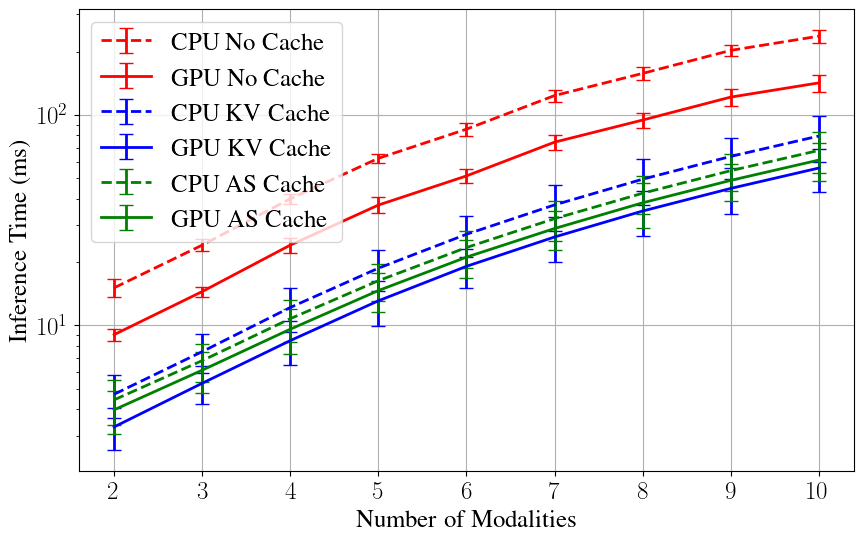

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Configure Matplotlib to use LaTeX for rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use serif font in conjunction with LaTeX
    # Set the default font to be used in LaTeX as a single string
    "text.latex.preamble": r"\usepackage{times}",
})

# Load the data from the provided CSV file
file_path = 'data/Inference_Comparison_Data.csv'
data = pd.read_csv(file_path)

# Clean and organize the data
# Extracting relevant rows and columns, and renaming them for clarity

# Row indices to skip (headers and blank rows)
skip_rows = [0, 1]

# Column names
columns = [
    "Number of Modalities", "Total Parameters", 
    "CPU No Cache", "CPU KV Cache", "CPU AS Cache", 
    "GPU No Cache", "GPU KV Cache", "GPU AS Cache"
]

# Load the data again with proper headers
data_cleaned = pd.read_csv(file_path, skiprows=skip_rows, names=columns)

# Convert the inference times to numeric values by splitting and taking the mean and standard deviation of the values
def extract_mean_and_std(time_str):
    try:
        mean, std_dev = time_str.split('±')
        return float(mean.strip()), float(std_dev.strip())
    except (ValueError, AttributeError):
        return None, None

# Apply the extraction function to the inference time columns with error handling
for col in columns[2:]:
    data_cleaned[[col, col + " Std Dev"]] = data_cleaned[col].apply(lambda x: pd.Series(extract_mean_and_std(x)))

# Drop rows with any NaN values in the inference time columns
data_cleaned = data_cleaned.dropna(subset=columns[2:])

# Plotting the graph with the cleaned data
plt.figure(figsize=(10, 6))

# Plotting for CPU
plt.errorbar(data_cleaned["Number of Modalities"], data_cleaned["CPU No Cache"], 
             yerr=data_cleaned["CPU No Cache Std Dev"], fmt='r--', label="CPU No Cache", linewidth=2, capsize=5)
plt.errorbar(data_cleaned["Number of Modalities"], data_cleaned["CPU KV Cache"], 
             yerr=data_cleaned["CPU KV Cache Std Dev"], fmt='b--', label="CPU KV Cache", linewidth=2, capsize=5)
plt.errorbar(data_cleaned["Number of Modalities"], data_cleaned["CPU AS Cache"], 
             yerr=data_cleaned["CPU AS Cache Std Dev"], fmt='g--', label="CPU AS Cache", linewidth=2, capsize=5)

# Plotting for GPU
plt.errorbar(data_cleaned["Number of Modalities"], data_cleaned["GPU No Cache"], 
             yerr=data_cleaned["GPU No Cache Std Dev"], fmt='r-', label="GPU No Cache", linewidth=2, capsize=5)
plt.errorbar(data_cleaned["Number of Modalities"], data_cleaned["GPU KV Cache"], 
             yerr=data_cleaned["GPU KV Cache Std Dev"], fmt='b-', label="GPU KV Cache", linewidth=2, capsize=5)
plt.errorbar(data_cleaned["Number of Modalities"], data_cleaned["GPU AS Cache"], 
             yerr=data_cleaned["GPU AS Cache Std Dev"], fmt='g-', label="GPU AS Cache", linewidth=2, capsize=5)

# Adding labels and legend
plt.xlabel("Number of Modalities", fontsize=18)
plt.ylabel("Inference Time (ms)", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Set the y-axis to logarithmic scale
plt.yscale('log')

# Order legend by cache type
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 3, 1, 4, 2, 5]  # reds together, blues together, greens together
plt.legend([handles[i] for i in order], [labels[i] for i in order], title_fontsize=20, fontsize=18, loc='upper left')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "LMRoman10"
})

# Show the plot
plt.grid(True)
plt.show()
